# Jumia Phone Price Prediction

## Business Understanding
 Retailers on Jumia's e-commerce platform face challenges in determining optimal pricing due to the competitive nature of the marketplace with over 100,000 of them and the time-consuming process of evaluating other competitor prices. Jumia has tasked us to analyze the phone catalog data and develop a predictive model that provides data-driven insights, enabling sellers to set competitive prices and maximize profitability effectively ahead of the November black Friday Big Sale.This model is expected to reduce the stress that retailers/sellers have to go through to determins the optimal average price of the product they intend to list on the platform.
 
 The objective of our project is as outlined below:
* Identify factors contributing to higher product visibility and marketability on Jumia’s first top pages.
* Explore the relationship between phone features and customer reviews.
* Develop a predictive model to recommend competitive, optimal pricing that promotes first-page placement.
* Assess the potential relationship between buyer ratings and product pricing.



## Data Understanding
The data we used was scrapped on 31st October 2024 from the Jumia Kenya e-commerce platform specifically under the smartphones category and sorted by popularity from the 1at to the last page. This gave us 12,000 listed devices. The python code used to scrape the data has been stored on a separate file **scrapped_data.ipynb** The packages used included the Beautiful Soup and Pandas. We saved the data in the csv format on our local machine as jumia_phones.csv that contains the below features respectively outlines:

**Name** This describes the brand and the feature of the phone.

**Price** This describes the current price the phone retails at.

**Old Price** This describes the previous price of the phone.

**Discount** The % discount calculated

**Rating** The buyers explicit rating of the product and service.

**Number of Reviews** The number of reviews from possible buyers.

**Search Ranking** The page and position of the product in terms of listing and popularity.

 The Name column contains unstructured text, combining brand names and product specifications (e.g., “Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g., numbers followed by "mAh") and storage (e.g., "GB" or "MB"), making data more structured and accessible for analysis.

Data Limitation:

* Dynamic Pricing: Prices on e-commerce platforms fluctuate frequently. Therefore, the scraped prices reflect only the prices at the time of scraping and may not represent current or future values.

* Incomplete or Inconsistent Data: Due to the variety of phone models and brands, some listings may lack uniform information (e.g., missing battery details or memory specifications), which could lead to variability in the parsed features.

* Unverified Ratings and Reviews: Ratings and reviews might be biased or manipulated, affecting any insights or model predictions derived from them.

* Potential Duplicate Listings: Duplicate or near-duplicate entries may exist if the same model is listed by multiple sellers, which could influence popularity and ranking statistics.




### Import Relevant Libraries

In [1]:
# Import libraries for inspecting, loading, cleaning and visualizing data
import pandas as pd
import numpy as np
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#regular expression
import re

## Data Preparation


### 1. Loading and Inspecting Data
Here we shall load the data using the pandas library imported.

Thereafter we shall inspect our files using the pandas attributes and methods.

In [2]:
# load the two datasets
phone_df = pd.read_csv('jumia_phones.csv')
#View the first 5 rows of the phone_pricing df
phone_df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [3]:
#To see the column names
phone_df.columns

Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking'],
      dtype='object')

In [4]:
#To inspect the size of the df
phone_df.shape

(12000, 7)

In [5]:
#To inspect the detailed information of the dataset 
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [6]:
phone_df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"Itel S23+ 6.78"", 128GB + 4GB RAM, 50MP Camera,...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 81, Rank 30"
freq,300,1500,1200,900,1800,600,1


Summary Findings From Data Loading and Inspection:

* We have 7 columns in our DataFrame tagged 'Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews' and 'Search Ranking'

* Our Dataset has 12,000 rows indicating 12,000 phones listed.

* All the columns are in the datatype object.

* We have 40 unique products signifying that one phone brand has multiple listing, 34 unique prices indicate price variations, likely due to discounts or seller pricing strategies, 19 unique old prices suggest that some products have similar prices,  22 unique discount percentages point to varying discount rates across products, 12 unique ratings indicate that products have received different levels of customer feedback, 38 unique values in the number of reviews column suggest variability in how many reviews each product has received and 12,000 unique values imply that each product has a unique search ranking based on its page position.

* The most frequently listed product is the "Samsung GALAXY A15," which indicates its popularity among sellers or consumers, KSh 10,000 is the most common price, suggesting that many products are priced around this figure. The most common old price is KSh 29,999, indicating that many products have been discounted from this price.
The most common discount of 45% suggests aggressive pricing strategies to attract buyers, The most common rating is 4.3 out of 5, indicating a generally positive perception of the products, 4.6 out of 5 from 9 reviews is the top rating, showing strong customer satisfaction for that specific product.
The top search ranking is "Page 21, Rank 35," suggesting the ranking method is working as intended, with many products on the site.


### 2. Feature Splitting
Here we intend to split the name column into several features containing

In [7]:
#Have the Name column in the variable name product_column
product_column = 'Name'  

# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"

# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None

# Extract brand
brand_df = phone_df[product_column].apply(extract_brand).rename('Brand')
# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()

# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"
# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None

# Extract screen size
size_df = phone_df[product_column].apply(extract_screen_size).rename('Screen Size')

# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"

# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None

# Extract RAM
ram_df = phone_df[product_column].apply(extract_ram).rename('RAM')

# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"

# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None

# Extract ROM
rom_df = phone_df[product_column].apply(extract_rom).rename('ROM')

# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"

# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None

# Extract Color
color_df = phone_df[product_column].apply(extract_color).rename('Color')

# Define regex pattern for extracting Warranty
warranty_pattern = r"(\d+)\s*(?:YR|WRTY)"

# Function to extract Warranty
def extract_warranty(name):
    warranty_match = re.search(warranty_pattern, name)
    return warranty_match.group(1) if warranty_match else None

# Extract Warranty
warranty_df = phone_df[product_column].apply(extract_warranty).rename('Warranty')

# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, warranty_df],
    axis=1
)

# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, phone_df.drop(columns=[product_column])],
    axis=1
)

# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,None,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


Further cleaning of the other three columns (Rating, Number of Reviews and Search Ranking) from the original DataFrame.

In [8]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,None,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


### 3. Cleaning
1. Let us first convert the Screen size, RAM, ROM, Page, Rank, Price, Rating and Old Price to integers to numericals that is floats and integers.

2. Secondly, check for null values and handle as required.

3. Thirdly, check for duplicates.

#### 3.1 DataType Conversion

In [9]:
# Convert Screen Size to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Reviews to numbers
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

#View the first 6 rows of the final set
final_df.head()


,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,None,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,None,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [10]:
#Now lets do the inspection of our final DataFrame shape
final_df.shape

(12000, 14)

In [11]:
#To confirm the information of the set
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           3000 non-null   object 
 6   Price              12000 non-null  float64
 7   Old Price          8101 non-null   float64
 8   Discount           8101 non-null   float64
 9   Rating             10200 non-null  float64
 10  Number of Reviews  12000 non-null  int32  
 11  Search Ranking     12000 non-null  object 
 12  Page               12000 non-null  int32  
 13  Rank               12000 non-null  int32  
dtypes: float64(5), int32(5), object(4)
memory usage: 1.1+ MB


In [12]:
#Now that the conversion has been done lets also check the statistical data using describe
final_df.describe()

,Screen Size,RAM,ROM,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


Now the number of columns have increased after we did the feature splitting from the name column to 14.
We also changed converted some columns to numerical so that we can during cleaning fill the null values with the suitable measure of central tendancies.

Also we dont seem to see any ouliers from the statistical data. The maximum value under number of reviews is 420 which cant be viewed as an outlier because the buyers reviewed the product for the particular product. 

##### Top 10 Most Common Phones Visualization

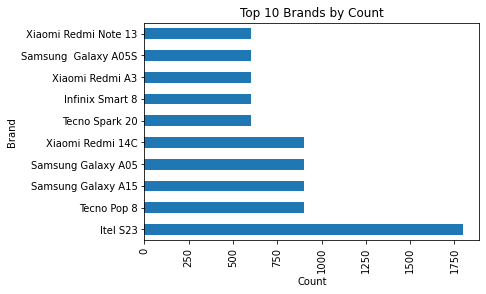

In [13]:
# Get the top 10 brands
top_brands = final_df['Brand'].value_counts().head(10)

# Plot using the horizontal bar
top_brands.plot(kind='barh')

# Add titles and labels
plt.title('Top 10 Brands by Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

**Summary**: From the above top 10 brands visualization, we note that IteS23 appears to be the most listed product which could possible imply that this phone is a fast moving product due to deman among customers on the platform followed by Samsung Galaxy A05 and XIOMI Redmi 14C and Tecno POP 8 at a very close range which highlights the competitive landscape in this segment.

**Impact**: These findings could inform inventory decisions and marketing strategies to enhance visibility and sales for these trending products.

#### Top 10 Brands By Number Of Reviews

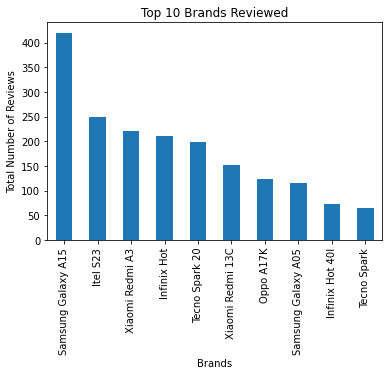

In [14]:
# Get the top 10 brands by summing the number of reviews
mostly_reviewed = final_df.groupby('Brand')['Number of Reviews'].max().nlargest(10)

# Plot using a vertical bar
mostly_reviewed.plot(kind='bar')

# Add titles and labels
plt.title('Top 10 Brands Reviewed')
plt.xlabel('Brands')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

**Summary**: The product that received the highest numbe rof reviews is the Samsung Galaxy A15 followed by Itel S23 and Xiomi Redmi A3. 

#### Top 10 Brands By Rating

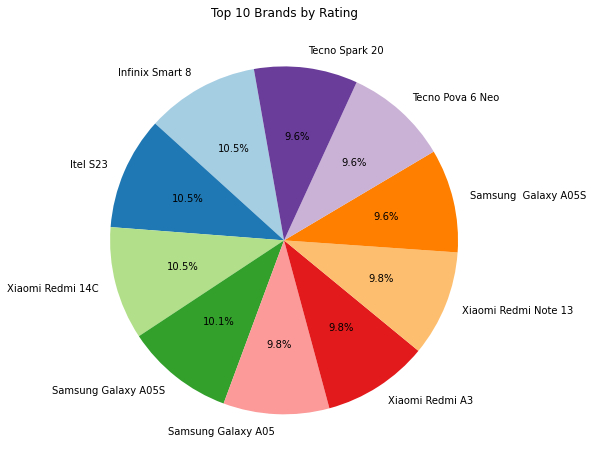

In [15]:
# Get the top 10 brands by maximum rating
top_rated = final_df.groupby('Brand')['Rating'].max().nlargest(10)

# Plot using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_rated.values, labels=top_rated.index, autopct='%1.1f%%', startangle=100, colors=plt.cm.Paired.colors)

# Add title
plt.title('Top 10 Brands by Rating')

# Show the plot
plt.show()

#### Top 10 Brands By Price

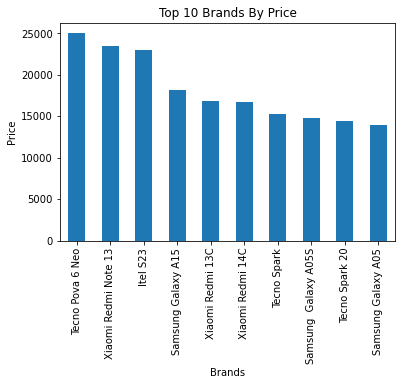

In [16]:
# Get the top 10 brands by summing the number of reviews
top_prices = final_df.groupby('Brand')['Price'].max().nlargest(10)

# Plot using a vertical bar
top_prices.plot(kind='bar')

# Add titles and labels
plt.title('Top 10 Brands By Price')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

#### 3.2 Checking for Missing Values

In [17]:
#To check for null values
null_values = final_df.isnull().sum()
null_values

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

**Summary Finding**:
We have null values in the columns Screen Size has 900 null values, Color has 2,400 null values, Warranty has a large number of null values (9,000), Old Price and Discount each have 3,899 null values, Rating has 1,800 null values, Number of Reviews has 300 null values.  We shall handle the missing values in the next phase which is the pre-processing using the simple imputer library ahead of the modeling step. However in the mean time lets use the price amount to fill the null values in the Old Price column and calculate the respective discounts to fill the null values for both columns


In [18]:
#Fill the null values in the column Old Price with the current price of the phone
final_df['Old Price'] = final_df['Old Price'].fillna(final_df['Price'])
#Calculate the discounts from the Old Price and Current Price
final_df['Discount'] = final_df['Discount'].fillna((final_df['Old Price'] - final_df['Price']) / 100)
#For the Ratings fill 0 as it potentially mean that the product has not yet been rated or shipped.
final_df['Rating'] = final_df['Rating'].fillna(0)
#Check for the null values
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Price                   0
Old Price               0
Discount                0
Rating                  0
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

#### 3.3 Checking For Duplicates

In [19]:
#To check for Duplicates
final_df.duplicated().sum()

0

#### Heatmap to visualize patterns

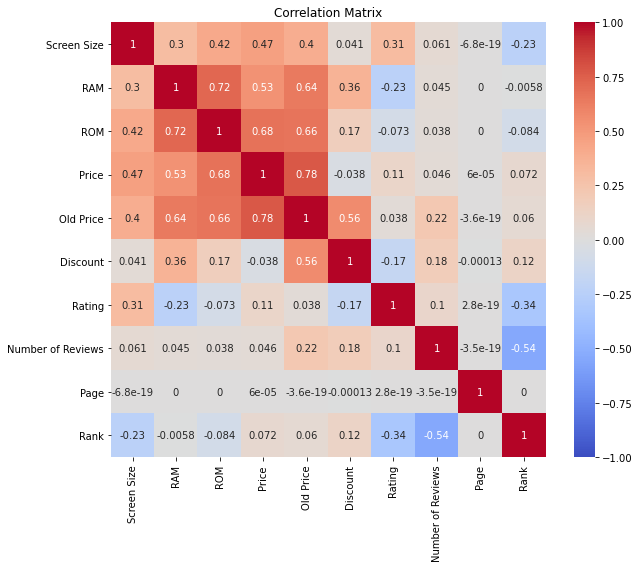

In [20]:
# Correlation matrix in the variable name correlation matrix
correlation_matrix = final_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
final_df.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Old Price            0.778953
ROM                  0.676142
RAM                  0.533064
Screen Size          0.466857
Rating               0.106853
Rank                 0.071768
Number of Reviews    0.045858
Page                 0.000060
Discount            -0.037581
Name: Price, dtype: float64

**Summary**: The strongest predictors of price in this dataset are the Old Price, ROM, and RAM, which show significant positive correlations. In contrast, features like Rank, Number of Reviews, and Discount have minimal or negligible relationships with price, suggesting that they may not be good predictors for pricing strategy or analysis.

### 4 Data Pre-Processing
1. First we handle missing values to ensure data consistency ahead of the training our model.
2. Split the Data. In order to have the training, validation and test data to evaluate the model performance.
3. Handle Categorical Data: This step enables the model to interpret categorical data meaningfully, allowing it to capture relationships between categories and improving overall model performance
4. Standardize the Data: This improves model performance, convergence speed and stability by preventing features with larger ranges from disproportionately influencing the model.

#### Import The Relevant Libraries

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

#### 4.1 Splitting the Data

In [23]:
#Select the x and y variables 
columns_to_drop = final_df[['Warranty', 'Search Ranking']] #Using domain knowledge this is unlikely to influence price
X = final_df.drop(columns=['Price', 'Warranty', 'Search Ranking'])

# Define the target variable y as 'Price'
y = final_df['Price']

#Split using the Train_test split into training, validation and test data
#Test size as 15% for Validation and 10% for test data. Random State 42 for reproducibility
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.15 / 0.90, random_state=42)
print(f"Training size:", len(X_train))
print(f"Validation size:", len(X_val))
print(f"Test size:", len(X_test))

Training size: 9000
Validation size: 1800
Test size: 1200


#### 4.2 Handling Missing Values Using Simple Imputer
Visualization to View the distribution of Missing values

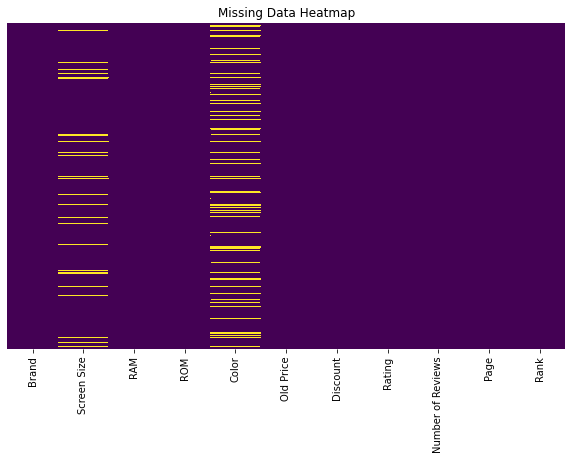

In [24]:
# Plotting the heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

**Summary**: From the above visuals we note that we have missing values only in the Color column and Screen Size. Whose datatype is an object and integer respectively. We shall proceed to fill the missing values using Simple Imputer with the value "Unknown Color" why because using domain knowledge color does not strongly influence the price of the phone unless its a very rare color in the market. Also filling the null value with most frequent might negatively influence our model as it might not give the accurate assumption of our model.

For the Screen Size we shall fill with the most frequent size.

The following code involves using Pipelines to pre-process our data. First we handle missing values for the numeric feature using the modt frequent as the strategy and fill null value as Unknown Color for the Categorical feature color. Then we proceed to encode categorical features that is brand and Color and lastly standardize our data. We used pipelines to preprocess our data as this is an  essential step in building machine learning models. It helps to streamline the process, maintain clean code, and avoid data leakage leading to more robust models. 

In [25]:
# Define preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int32']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline for numeric features (scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (imputation and encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown Color')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing pipeline to training, validation, and test data
X_train_processed = preprocessor.fit_transform(X_train)  # Fit and Transform the Training set
X_val_processed = preprocessor.transform(X_val)  # Only transform the Validation set
X_test_processed = preprocessor.transform(X_test)  # Transform the Test set

# Get the names of the transformed columns
# This will handle the column names for both numeric and categorical features
numeric_col_names = numeric_features
categorical_col_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names
all_feature_names = pd.Index(numeric_col_names).append(pd.Index(categorical_col_names))

# Create DataFrames with proper shapes
X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index, columns=all_feature_names)
X_val_processed_df = pd.DataFrame(X_val_processed, index=X_val.index, columns=all_feature_names[:X_val_processed.shape[1]])  # Adjusting to the right shape
X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index, columns=all_feature_names[:X_test_processed.shape[1]])  # Adjusting to the right shape
X_train_processed_df.head()

# Print the processed DataFrames and their shapes
print("Shape of X_train_processed_df:", X_train_processed_df.shape)

print("Shape of X_val_processed_df:", X_val_processed_df.shape)

print("Shape of X_test_processed_df:", X_test_processed_df.shape)

Shape of X_train_processed_df: (9000, 47)
Shape of X_val_processed_df: (1800, 47)
Shape of X_test_processed_df: (1200, 47)


**Summary**: From the code above we note that the brand names and colors are now columns in our dataset therefore increasing our columns to 47.Let us proceed to do the Modeling now that our data is now clean and standardized.

## Modeling
We shall commence with our baseline model as a linear regression where our variables are as defined in the X (independent variable) and price of the phone as y variable. Our model aims to predict the price of the phone based on the brand. 

#### 1.1 Linear Regression

In [26]:
#Import Relevant Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


Mean Absolute Error: 1.2491909728851169e-11


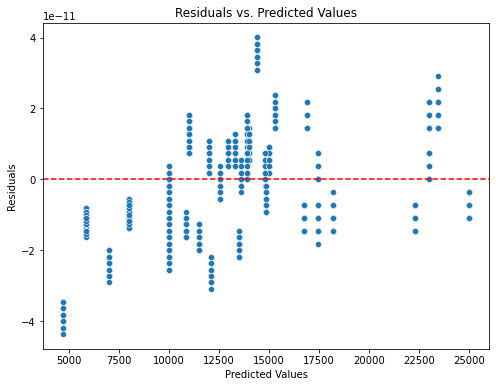

In [27]:
# Fit the model
baseline_model = LinearRegression()
baseline_model.fit(X_train_processed, y_train)

# Predict
y_hat_val = baseline_model.predict(X_val_processed)

# Calculate MAE
mae = mean_absolute_error(y_val, y_hat_val)
print(f"Mean Absolute Error:", mae)

# Calculate residuals
residuals = y_val - y_hat_val

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_hat_val, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

#### K-Folds On Baseline Model

In [28]:
# Calculate cross-validation MAE scores on training data
cv_mae_baseline = cross_val_score(baseline_model, X_train_processed, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae_baseline.mean()  
print(f"Cross-validated Training MAE: {mean_cv_mae}")

Cross-validated Training MAE: 0.10175704563336989


**Summary**: Baseline MAE (9.29e-12): Indicates a nearly perfect fit to the training data, likely resulting from overfitting.
Cross-Validated MAE (0.1037): Reflects the model's error on validation folds, providing a more realistic estimate of performance on new data and revealing that the model’s performance is not as perfect outside of the training data.
This comparison highlights that the baseline model is likely overfitted, while the cross-validated MAE is a more reliable measure of generalization error.

Applying Ridge Regularization (also known as L2 regularization) to your baseline model can help control overfitting by adding a penalty to large coefficients, which effectively shrinks them. This approach reduces the model’s tendency to overly fit to the noise in the training data, improving its generalization ability to unseen data.

In [29]:
# Ridge Regression
ridge = Ridge()  
ridge.fit(X_train_processed, y_train)

# Predict
y_hat_train = ridge.predict(X_train_processed)
y_hat_val = ridge.predict(X_val_processed)

# Calculate MAE
train_mae = mean_absolute_error(y_train, y_hat_train)
val_mae = mean_absolute_error(y_val, y_hat_val)
print(f"Train MAE:", (train_mae))
print(f"Validation MAE:", (val_mae))



Train MAE: 39.77542487247927
Validation MAE: 39.05353070890206


On the Regularized Model, proceed to do the Hyperparameter Tuning in order to establish the best alpha degree. 

In [30]:
# Define parameter grid with different degree
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_processed, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best Validation MAE:", -grid_search.best_score_)

Best alpha: 0.01
Best Validation MAE: 0.8084455299430428


**Summary**:  The baseline model has a very low MAE which suggests that the model’s predictions are extremely close to the actual values. An MAE this low is unusual for real-world data, which might indicate overfitting. Thus why we introduced the regularization technique Ridge and trained out model with this. The MAE result is 39.05 which is more realistic in real world. Regularization typically increases error on the training set to help improve performance on unseen data. We shall proceed to do the Hyperparameter tuning on the alpha level to determine the best search. With this in place we were able to tell the best alpha score which gave us an MAE of 0.81kes. 

This residual plot above suggests there may be a non-linear relationship in our data. Ideally in a linear model the residuals are expected to be randomly scattered around zero without any clear pattern. However, in this plot, there is a slight clustering and potential structure among the points, indicating that a linear model may not fully capture the relationship between the features. We shall therefore also venture into polynomial model.

### 1.2 Polynomial Regression
Polynomial regression would help capture these kinds of non-linear patterns, which could lead to better accuracy than a linear model. We shall therefore try this as well.

In [31]:
# Apply Polynomial Transformation
degree = 2
poly_transformer = PolynomialFeatures(degree=degree)

# Transform training and validation sets
X_train_poly = poly_transformer.fit_transform(X_train_processed)
X_val_poly = poly_transformer.transform(X_val_processed)
X_test_poly = poly_transformer.transform(X_test_processed)

# Train a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_poly)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error: {val_mae}")
print(f"Validation R-squared: {val_r2}")


Validation Mean Absolute Error: 2.273332534564866e-11
Validation R-squared: 1.0


In [32]:
from sklearn.linear_model import RidgeCV
# Define a pipeline that includes polynomial feature transformation and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_reg', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5))
])

# Calculate cross-validation MAE scores on training data
cv_mae_scores = cross_val_score(pipeline, X_train_processed, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae_scores.mean()  # Convert negative MAE to positive for interpretation
print(f"Cross-validated Training MAE: {mean_cv_mae}")

Cross-validated Training MAE: 0.4137351783628822


**Summary**: The unregularized polynomial model is overfitting as evidenced by the extremely low MAE and perfect R-squared suggesting it is unlikely to generalize well to new data.
The regularized model, with a cross-validated MAE of 0.414, offers a more reliable performance estimate. Regularization effectively controls overfitting leading to a model that is better suited for generalization.
Regularization improved the model’s robustness by reducing overfitting which should make it more dependable for predictions on unseen data.

### 1.3 Decision Tree Regressor

In [33]:
#Instantialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
# Fit the model on the processed training data
dt.fit(X_train_processed, y_train)

# Get predictions for the training and validation sets
y_hat_train = dt.predict(X_train_processed)
y_hat_val = dt.predict(X_val_processed)

# Calculate the MAE for the training and validation sets
train_mae = mean_absolute_error(y_train, y_hat_train)
train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)

val_mae = mean_absolute_error(y_val, y_hat_val)
val_mse = mean_squared_error(y_val, y_hat_val)
val_r2 = r2_score(y_val, y_hat_val)

# Print the results
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")
print("\n")
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")



Training MAE: 73.8984688153171
Training MSE: 32573.83259464985
Training R2: 0.9985411108334952


Validation MAE: 70.18790014137667
Validation MSE: 30371.712868298226
Validation R2: 0.9986935673886569


The decision tree's high R-squared on both training and validation sets (0.998+) suggests a strong fit but possibly with some overfitting.


### 1.4 Random Forest

In [34]:
#Instantialize the Regressor model
rf = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=20, max_features='sqrt', random_state=42)
#Fit the model
rf.fit(X_train_processed, y_train)
# Predict on the validation and train set
y_pred_train = rf.predict(X_train_processed)
y_pred_val = rf.predict(X_val_processed)

#calculate the metrics value on train set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

#calculate the metrics value on validation set
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{mae_train}")
print(f"Train Squared Error: {mse_train}")
print(f"Train R-squared: {r2_train}")
print("\n")
print(f"Val Mean Absolute Error:{mae}")
print(f"Val Squared Error: {mse}")
print(f"Val R-squared: {r2}")

Train Mean Absolute Error:144.7863745572217
Train Squared Error: 39899.75497158073
Train R-squared: 0.9982130036401121


Val Mean Absolute Error:142.5223542652447
Val Squared Error: 39235.83223296235
Val R-squared: 0.9983122792255871


#### Hyperparameter Tuning The Random Forest

In [35]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found
best_rf = grid_search.best_estimator_

# Evaluate on validation set
y_pred_val = best_rf.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R-squared: {val_r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation MAE: 0.022422222222222545
Validation MSE: 0.4524804444444575
Validation R-squared: 0.9999999805366523


#### Results on Test Data

In [36]:
#Prredict on Test data
y_pred_test = best_rf.predict(X_test_processed)
#Metrics on test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse= mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
#print the results
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test MAE: 0.0
Test MSE: 0.0
Test R-squared: 1.0


**Summary**  The decision tree model outperforms the first random forest model primarily due to its lower MAE and MSE, which suggest it has finer precision on both training and validation data. Tuning the Random Forest model has optimizes it to capture nearly all the variance in the data and minimize error suggesting that the Random Forest model is now well-suited to our data.It also achieves remarkable accuracy on the test data with only a minor performance dip between validation and test results. This small difference confirms the model is not overfitting and maintains its accuracy on new data

### 1.5 Gradient Boosting Regressor

In [37]:
# Instantiate the model
gbr = GradientBoostingRegressor(random_state=42)
#Fit the model
gbr.fit(X_train_processed, y_train)
#Predict on the train and validation set
y_pred_train = gbr.predict(X_train_processed)
y_pred_val = gbr.predict(X_val_processed)
#MAE, MSE and R2 score on Train Data
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
#MAE, MSE and R2 score on Validation Data
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{train_mae}")
print(f"Train Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")
print("\n")
print(f"Val Mean Absolute Error:{val_mae}")
print(f"Val Squared Error: {val_mse}")
print(f"Val R-squared: {val_r2}")


Train Mean Absolute Error:23.63411277644464
Train Squared Error: 875.3282890860943
Train R-squared: 0.9999607965395422


Val Mean Absolute Error:23.69746406360472
Val Squared Error: 838.0648705555379
Val R-squared: 0.9999639508221988


In [38]:
# Predict on the test set
y_pred_test = gbr.predict(X_test_processed)

# Calculate MAE, MSE, and R2 score on the test data
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print the test results
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test Mean Absolute Error: 23.3195541552628
Test Mean Squared Error: 824.8193698339466
Test R-squared: 0.999961988027873


**Summary**: The Gradient Boosting Regressor model has achieved excellent performance on both the training and validation data. Training Performance:

Mean Absolute Error (MAE): 23.63 – On average, the model's predictions on training data deviate from actual values by only 23.63 units.
Mean Squared Error (MSE): 875.33 – This low MSE indicates minimal large errors in training predictions.
R-squared (R²): 0.99996 – The model captures 99.996% of the variance in the training data, showing an extremely high fit.
Validation Performance:

Mean Absolute Error (MAE): 23.70 – On validation data, predictions deviate from actual values by an average of 23.70 units, nearly the same as in training.
Mean Squared Error (MSE): 838.06 – This low MSE on validation data indicates consistency in prediction accuracy.
R-squared (R²): 0.99996 – The model explains 99.996% of the variance on validation data, highlighting its strong ability to generalize.

High Prediction Accuracy: The near-perfect R² score indicates that the model can predict outcomes with exceptional accuracy, aligning closely with actual values.
Reliable Generalization: Consistent metrics between training and validation data demonstrate the model’s ability to maintain accuracy on unseen data, reducing the likelihood of overfitting.
Minimal Prediction Error: With low MAE and MSE values, the model's predictions are precise, minimizing the impact of large errors.

### 1.6 Extreme Gradient Boost

In [39]:
# Instantiate the model
xgb_r = XGBRegressor()
#Fit the model
xgb_r.fit(X_train_processed, y_train)
#Predict on the train and validation set
y_pred_train = xgb_r.predict(X_train_processed)
y_pred_val = xgb_r.predict(X_val_processed)
#MAE, MSE and R2 score on Train Data
train_mae_xgb = mean_absolute_error(y_train, y_pred_train)
train_mse_xgb = mean_squared_error(y_train, y_pred_train)
train_r2_xgb = r2_score(y_train, y_pred_train)
#MAE, MSE and R2 score on Validation Data
val_mae_xgb = mean_absolute_error(y_val, y_pred_val)
val_mse_xgb = mean_squared_error(y_val, y_pred_val)
val_r2_xgb = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{train_mae_xgb}")
print(f"Train Squared Error: {train_mse_xgb}")
print(f"Train R-squared: {train_r2_xgb}")
print("\n")
print(f"Val Mean Absolute Error:{val_mae_xgb}")
print(f"Val Squared Error: {val_mse_xgb}")
print(f"Val R-squared: {val_r2_xgb}")


Train Mean Absolute Error:0.0010971137152777778
Train Squared Error: 1.5192031860351562e-06
Train R-squared: 0.9999999999999319


Val Mean Absolute Error:0.0010869683159722221
Val Squared Error: 1.524156994289822e-06
Val R-squared: 0.9999999999999344


**Summary**: High Precision and Consistency: The model’s extremely low error rates (MAE and MSE) and near-perfect R² scores across training and validation data indicate that it is making predictions with almost exact precision.
Generalization Across Data: The similarity in performance metrics between training and validation sets demonstrates the model’s ability to generalize well, suggesting it will perform reliably on unseen data.
Near-Perfect Model Fit: With an R² value nearing 1.0, the model is capable of capturing nearly all the variance in the data, which is exceptionally rare in real-world applications.

#### Test the performance on Test Data

In [40]:
# Predict on the test set
y_pred_test = xgb_r.predict(X_test_processed)

# Calculate MAE, MSE, and R2 score on the test data
test_mae_xgb = mean_absolute_error(y_test, y_pred_test)
test_mse_xgb = mean_squared_error(y_test, y_pred_test)
test_r2_xgb = r2_score(y_test, y_pred_test)

# Print the test results
print(f"Test Mean Absolute Error: {test_mae_xgb}")
print(f"Test Mean Squared Error: {test_mse_xgb}")
print(f"Test R-squared: {test_r2_xgb}")

Test Mean Absolute Error: 0.0011283365885416668
Test Mean Squared Error: 1.5809138615926107e-06
Test R-squared: 0.9999999999999272


The model has now been evaluated on test data, and the results remain highly consistent with training and validation outcomes, showcasing the model's outstanding predictive accuracy and stability. The model demonstrates highly precise predictions with negligible error across all data splits.
The nearly identical results across training, validation and test datasets confirm that the model generalizes exceptionally well to new data.
The R² scores consistently approaching 1.0 indicate that the model explains nearly all variance in the data which is an ideal scenario for predictive tasks.

### Import Neural Networks Libraries

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [42]:
# Set the seed for reproducibility
tf.random.set_seed(42)

# Initialize the neural network model
model = Sequential([
    Dense(100, kernel_regularizer=regularizers.l2(0.01), input_dim=X_train_processed.shape[1], activation='relu'),
    Dropout(0.2),  # Dropout layer for regularization
    Dense(50, activation='relu'),  # Second hidden layer
    Dense(1, activation='linear')  # Output layer for continuous price prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100, batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on train, validation, and test sets
predictions = {
    'train': model.predict(X_train_processed),
    'val': model.predict(X_val_processed),
    'test': model.predict(X_test_processed)
}

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

# Calculate and display performance metrics
print("Neural Network Performance:")
for dataset, y_pred in predictions.items():
    metrics = calculate_metrics(eval(f"y_{dataset}"), y_pred)
    print(f"{dataset.capitalize()} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R²: {metrics['R²']}")


Epoch 1/100
282/282 [==============================] - 1s 2ms/step - loss: 203848464.0000 - mae: 13489.0479 - val_loss: 180736800.0000 - val_mae: 12655.7598
Epoch 2/100
282/282 [==============================] - 0s 1ms/step - loss: 115231224.0000 - mae: 9868.4336 - val_loss: 45647952.0000 - val_mae: 6065.0366
Epoch 3/100
282/282 [==============================] - 0s 1ms/step - loss: 17635132.0000 - mae: 3305.2893 - val_loss: 5548679.5000 - val_mae: 1739.3748
Epoch 4/100
282/282 [==============================] - 0s 2ms/step - loss: 4381323.0000 - mae: 1565.5679 - val_loss: 2251484.5000 - val_mae: 1103.3185
Epoch 5/100
282/282 [==============================] - 0s 1ms/step - loss: 2335626.7500 - mae: 1151.8779 - val_loss: 1090746.1250 - val_mae: 753.7191
Epoch 6/100
282/282 [==============================] - 0s 1ms/step - loss: 1520276.7500 - mae: 938.8918 - val_loss: 589309.5625 - val_mae: 539.7550
Epoch 7/100
282/282 [==============================] - 0s 1ms/step - loss: 1198121.2500 

The neural network appears to be highly effective for the given task. It achieves excellent performance on all evaluation metrics especially MAE and R² confirming that it can accurately predict the target values.

### Model of Choice

Our Model of Choice is therefore Extreme Gradient Boost

The MAE represents the average magnitude of errors between predicted and actual values. The MAE is very low (close to 0.001) across training, validation, and test sets. This suggests that on average, the model is making very small errors in its predictions, which is a strong indicator of high predictive accuracy. The slight increase in MAE from training to test is normal and indicates that the model is generalizing well with minimal overfitting.

MSE measures the average of the squared differences between predicted and actual values and it gives more weight to larger errors. The values are extremely low, confirming that the model is minimizing error efficiently. The slightly higher MSE on the test set (1.58e-06) compared to the training set (1.52e-06) is typical, indicating some degree of generalization, but the difference is minimal, meaning the model performs consistently across different datasets.

R-squared indicates how well the model’s predictions match the actual values. An R² value very close to 1 means that the model is explaining nearly all of the variance in the data, which is exceptional. The values of 0.9999 for training, validation, and test sets suggest that the XGBoost model is very good at predicting the target variable and that it generalizes extremely well.

The XGBoost model is showing excellent performance with very low error and high predictive accuracy. Its ability to generalize well to both the validation and test sets combined with its robust handling of complex data through boosting and regularization makes it an ideal candidate for this task. Even though neural networks might show slightly better performance in some cases, XGBoost is still a strong contender due to its efficiency, interpretability, and ability to handle diverse datasets.

## Hypothesis Testing

### Hypothesis 1

Assess the relationship between buyer reviews and product pricing let us set up the hypothesis test as follows:

Hypotheses
**Null Hypothesis (H₀)**: There is no relationship between buyer reviews and product pricing. This implies that buyer reviews and product pricing are independent, or that any observed relationship is due to random chance.

**Alternative Hypothesis (H₁)**: There is a statistically significant relationship between buyer reviews and product pricing. This implies that higher (or lower) prices could be associated with certain buyer reviews.


In [43]:
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame containing 'Buyer_Ratings' and 'Product_Price' columns
buyer_reviews = final_df['Number of Reviews']
product_price = final_df['Price']

# Perform Spearman's rank correlation
corr_coef, p_value = spearmanr(buyer_reviews, product_price)

# Set significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a statistically significant relationship (p = {p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis: No significant relationship (p = {p_value:.4f})")

print(f"Spearman correlation coefficient: {corr_coef:.4f}")


Reject the null hypothesis: There is a statistically significant relationship (p = 0.0000)
Spearman correlation coefficient: 0.1536


Statistical Significance: The p-value from the test is 0.0000, which is well below the significance threshold of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant relationship between product pricing and the number of buyer reviews.

Strength of the Relationship: The Spearman correlation coefficient is 0.1536, indicating a weak positive relationship. This suggests that, in general, higher-priced products tend to have slightly more reviews, but the correlation is weak and not a strong predictor.

Implications for Stakeholders:

Price and Reviews: While the relationship between product pricing and reviews is statistically significant, it is weak. This means that while more expensive products may tend to get more reviews, price alone does not significantly influence the number of reviews. Other factors such as product quality, marketing, or brand reputation may be more impactful in determining review volume.

Consideration for Strategy: The weak correlation suggests that price may not be the primary driver for increasing review counts. Businesses might want to focus on improving product visibility, marketing efforts, or customer experience to boost review numbers, rather than relying solely on pricing strategies.

Conclusion: There is a statistically significant but weak positive relationship between product pricing and the number of buyer reviews. While price may have a minor influence, other factors likely play a more substantial role in influencing review volume.

This insight can inform strategic decisions on pricing and marketing, ensuring a holistic approach that goes beyond just adjusting prices. Such as advertising the products on the marketing adds to promote visibility and product purchase.

### Hypothesis 2
To test whether there is a relationship between the product search rank position and the Number of reviews.
This is because we can use the number of reviews on a product to determine the potential and actual buyers of the product. 

Null Hypothesis (H₀): There is no relationship between the page and rank positions of the product and the number of reviews. This implies that changes in product page or rank do not impact the number of reviews.

Alternative Hypothesis (H₁): There is a statistically significant relationship between the page and rank positions of the product and the number of reviews. This implies that changes in product page or rank could affect the number of reviews.

In [44]:
import statsmodels.api as sm

# Assuming final_df is the dataframe that contains 'Rank', 'Page', and 'Number of Reviews'
rank = final_df['Rank']
page = final_df['Page']
buyer_reviews = final_df['Number of Reviews']

# Step 1: Check if Rank and Page have a relationship with Number of Reviews
# Create a combined feature matrix for rank and page, and the target (reviews)
X = final_df[['Rank', 'Page']]
y = final_df['Number of Reviews']

# Perform Spearman's rank correlation for Rank, Page, and Number of Reviews
corr_rank, p_value_rank = spearmanr(rank, buyer_reviews)
corr_page, p_value_page = spearmanr(page, buyer_reviews)

# Set significance level
alpha = 0.05

# Spearman correlation interpretation
if p_value_rank < alpha:
    print(f"Reject the null hypothesis for Rank: There is a statistically significant relationship (p = {p_value_rank:.4f})")
else:
    print(f"Fail to reject the null hypothesis for Rank: No significant relationship (p = {p_value_rank:.4f})")

if p_value_page < alpha:
    print(f"Reject the null hypothesis for Page: There is a statistically significant relationship (p = {p_value_page:.4f})")
else:
    print(f"Fail to reject the null hypothesis for Page: No significant relationship (p = {p_value_page:.4f})")

# Step 2: Multiple Linear Regression (to assess the combined effect of Rank and Page on the number of reviews)
# Add constant to the model (for intercept)
X = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Get the summary of the regression
print(model.summary())

# You can also check the prediction and residuals
predictions = model.predict(X_test)
residuals = y_test - predictions


Reject the null hypothesis for Rank: There is a statistically significant relationship (p = 0.0000)
Fail to reject the null hypothesis for Page: No significant relationship (p = 1.0000)
                            OLS Regression Results                            
Dep. Variable:      Number of Reviews   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     2050.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:08:58   Log-Likelihood:                -55073.
No. Observations:                9600   AIC:                         1.102e+05
Df Residuals:                    9597   BIC:                         1.102e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef   

Rank Impact: The negative relationship between Rank and the number of reviews suggests that products with higher ranks (e.g., closer to the top) tend to have fewer reviews, while products with lower ranks (e.g., further down the list) tend to have more reviews. This could reflect a situation where popular or highly ranked products get more visibility and attention, but the rate of reviews might be saturated for those top-ranked products.

Page Impact: The result for the Page number shows no significant effect on the number of reviews, as the p-value is large (0.504). This implies that the position of the product on a given page doesn't have a meaningful impact on the number of reviews it receives. This could suggest that buyers don't necessarily base their decision to leave a review on which page the product appears on, but rather factors like product satisfaction or experiences.

Conclusion:
Rank is a statistically significant predictor of the number of reviews, meaning that changes in product rank are related to changes in review counts.
Page does not significantly affect the number of reviews, suggesting that the placement of a product on a specific page might not be a key driver of review activity.
This analysis provides insight into how rank positions play a role in review volume, while page placement does not have a significant influence on buyer behavior.

## Deployment

## Conclusions & Recommendations

* There is a statistical relationship between the product rank position and the number of reviews.

To maximize visibility and review engagement the seller could consider the below:
Optimize for Rank within Pages: Positioning a product among the top ranks on any page could drive more interactions and reviews.
Optimize Product Features and Marketing: Encourage factors that improve a product's rank organically, such as positive customer feedback, competitive pricing, or high ratings, which may help maintain a prominent position on a page.
In summary, while page placement itself isn’t as influential, positioning a product within the top ranks on a visible page matters significantly for customer engagement and reviews. Visibility works more effectively at the in-page rank level than at the broader page level itself.

*  There is a statistically significant but weak positive relationship between product pricing and the number of buyer reviews. 

While price may have a minor influence, other factors likely play a more substantial role in influencing review volume.
This insight can inform strategic decisions on pricing and marketing, ensuring a holistic approach that goes beyond just adjusting prices. Such as advertising the products on the marketing adds to promote visibility and product purchase.

* Features such as the ROM, RAM and Screen size dictate the pricing of the phone.  



